In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
data_path="C:/Users/abdo/Documents/ITI/iti_g2/data/raw/survey_results_public.csv"

In [46]:
df=pd.read_csv(data_path)
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [47]:
n=df.isna().sum()
df.shape

(64461, 61)

In [48]:
n.sort_values(ascending=False)

ConvertedComp             29705
CompTotal                 29635
NEWPurchaseResearch       27140
PurchaseWhat              25097
WebframeDesireNextYear    24437
                          ...  
Employment                  607
Country                     389
MainBranch                  299
Hobbyist                     45
Respondent                    0
Length: 61, dtype: int64

In [49]:
df=df.dropna(thresh=50)
df.shape

(39266, 61)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39266 entries, 0 to 64152
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    39266 non-null  int64  
 1   MainBranch                    39266 non-null  object 
 2   Hobbyist                      39266 non-null  object 
 3   Age                           35405 non-null  float64
 4   Age1stCode                    39176 non-null  object 
 5   CompFreq                      36228 non-null  object 
 6   CompTotal                     32513 non-null  float64
 7   ConvertedComp                 32454 non-null  float64
 8   Country                       39266 non-null  object 
 9   CurrencyDesc                  39266 non-null  object 
 10  CurrencySymbol                39266 non-null  object 
 11  DatabaseDesireNextYear        31552 non-null  object 
 12  DatabaseWorkedWith            35194 non-null  object 
 13  D

In [51]:
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))
df["Age"]=df["Age"].astype(int)


In [52]:
c=df.groupby("Country",as_index=False).size()

In [53]:
c.head()

,Country,size
0,Afghanistan,16
1,Albania,22
2,Algeria,26
3,Andorra,3
4,Angola,2


In [55]:
c=c.sort_values("size",ascending=False)

<AxesSubplot:xlabel='Country', ylabel='size'>

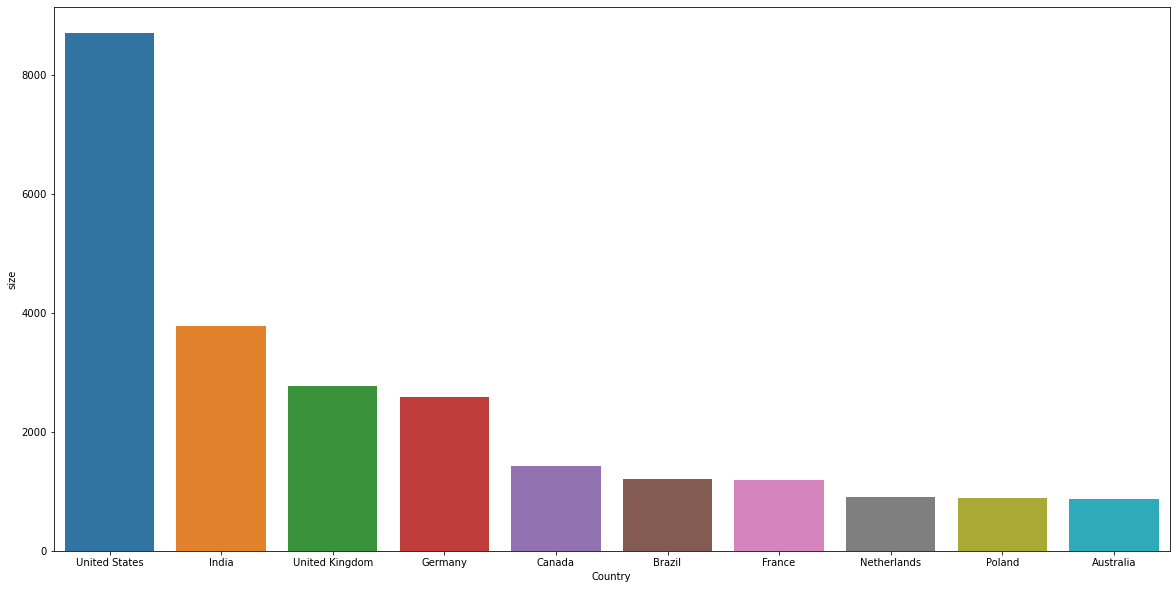

In [66]:
plt.figure(figsize=(20,10))
sns.barplot(x="Country",y="size",data=c[0:10])